In [1]:
import numpy as np
import pandas as pd
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pyarrow.parquet as pq

## Load and filter the data

In [4]:
data2020 = pd.DataFrame()

def process_chunk(chunk):
        print(f'Processing chunk with {len(chunk)} rows')
        data = pd.DataFrame()
        
        # Take only the quotes about climate change
        keywords = ["limate change", "lobal warming", "COP", "limate variation", "limate crisis"]
        mask = chunk.quotation.apply(lambda x: any(word in x for word in keywords))
        data = chunk[mask]

        print("Number of filtered quotes {} out of {}".format(len(data), len(chunk)))
        data[['quotation', 'speaker']].head()
        
        # Drop quotes without speaker
        no_speaker = data[data.speaker == "None"].index
        data = data.drop(no_speaker)
        print("{} quotes are removed".format(len(no_speaker)))
        
        #Drop useless informations
        del data["probas"]
        del data["phase"]
        del data["qids"]
        del data["urls"]

        return data
    

with pd.read_json('quotes-2020.json.bz2', lines=True, compression='bz2', chunksize=1000000) as df_reader:
    for chunk in df_reader:
        
        data2020 = data2020.append(process_chunk(chunk))
        


Processing chunk with 1000000 rows
Number of filtered quotes 2065 out of 1000000
648 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2043 out of 1000000
680 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 1990 out of 1000000
611 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2074 out of 1000000
630 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2133 out of 1000000
680 quotes are removed
Processing chunk with 244449 rows
Number of filtered quotes 494 out of 244449
174 quotes are removed


In [9]:
data2019 = pd.DataFrame()
data2018 = pd.DataFrame()
data2017 = pd.DataFrame()
data2016 = pd.DataFrame()
data2015 = pd.DataFrame()

def process_chunk(chunk):
        print(f'Processing chunk with {len(chunk)} rows')
        data = pd.DataFrame()
        
        # Take only the quotes about climate change
        keywords = ["limate change", "lobal warming", "COP", "limate variation", "limate crisis"]
        mask = chunk.quotation.apply(lambda x: any(word in x for word in keywords))
        data = chunk[mask]

        print("Number of filtered quotes {} out of {}".format(len(data), len(chunk)))
        data[['quotation', 'speaker']].head()
        
        # Drop quotes without speaker
        no_speaker = data[data.speaker == "None"].index
        data = data.drop(no_speaker)
        print("{} quotes are removed".format(len(no_speaker)))
        
        # Drop useless informations
        del data["probas"]
        del data["phase"]
        del data["qids"]
        del data["urls"]


        return data
    

with pd.read_json('quotes-2019.json.bz2', lines=True, compression='bz2', chunksize=1000000) as df_reader:
    for chunk in df_reader:
            
        data2019 = data2019.append(process_chunk(chunk))

Processing chunk with 1000000 rows
Number of filtered quotes 2142 out of 1000000
674 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2205 out of 1000000
708 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2181 out of 1000000
700 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2183 out of 1000000
689 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2143 out of 1000000
673 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2068 out of 1000000
672 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2126 out of 1000000
659 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2067 out of 1000000
652 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2249 out of 1000000
688 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 216

In [10]:
data2019.to_pickle("./data2019.pkl")

Saving the filtered data as pickle will save a lot of time later. 

In [ ]:
print(len(data2020))
data2020.head()

In [19]:
print(len(data2019))
data2019.head()

32651


quoteID                                          quotation  \
1015  2019-09-26-057277  It's managing those zillions of microbial cell...   
2314  2019-03-28-015294  Climate change is the single most important is...   
2316  2019-06-28-012580  Climate change represents an existential threa...   
3028  2019-05-08-019902  Even for Australians who can afford to pay, ge...   
5577  2019-01-20-042295  The challenges this year will include global t...   

               speaker                date  numOccurrences  
1015   Thomas Crowther 2019-09-26 11:00:45               1  
2314   Nicola Sturgeon 2019-03-28 14:55:43               1  
2316     Kamala Harris 2019-06-28 04:10:00               1  
3028           Dr Karl 2019-05-08 22:36:00               5  
5577  Nguyen Xuan Phuc 2019-01-20 03:40:26               7

We will do the same for all the years but, since it takes some time, we want to enrich our filter before loading all the data. For now, we just have 2019 and 2020.

## Load speaker data

In [60]:
df_speaker_country = pd.read_csv('wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')
df_speaker_country.head()

Label                                   Description
QID                                                                           
Q31                      Belgium                     country in western Europe
Q45                     Portugal                country in southwestern Europe
Q75                     Internet  global system of connected computer networks
Q148  People's Republic of China                  sovereign state in East Asia
Q155                      Brazil                      country in South America

In [2]:
speaker_df = pd.read_parquet("speaker_attributes.parquet", engine='pyarrow')
speaker_df.head()

aliases            date_of_birth  \
0  [Washington, President Washington, G. Washingt...  [+1732-02-22T00:00:00Z]   
1  [Douglas Noel Adams, Douglas Noël Adams, Dougl...  [+1952-03-11T00:00:00Z]   
2      [Paul Marie Ghislain Otlet, Paul Marie Otlet]  [+1868-08-23T00:00:00Z]   
3  [George Walker Bush, Bush Jr., Dubya, GWB, Bus...  [+1946-07-06T00:00:00Z]   
4  [Velázquez, Diego Rodríguez de Silva y Velázqu...  [+1599-06-06T00:00:00Z]   

      nationality      gender   lastrevid ethnic_group US_congress_bio_ID  \
0  [Q161885, Q30]  [Q6581097]  1395141751         None            W000178   
1          [Q145]  [Q6581097]  1395737157   [Q7994501]               None   
2           [Q31]  [Q6581097]  1380367296         None               None   
3           [Q30]  [Q6581097]  1395142029         None               None   
4           [Q29]  [Q6581097]  1391704596         None               None   

                                          occupation      party  \
0  [Q82955, Q189290, Q131512, Q1734662, Q294126, ...  [Q327591]   
1  [Q214917, Q28389, Q6625963, Q4853732, Q1884422...       None   
2  [Q36180, Q40348, Q182436, Q1265807, Q205375, Q...       None   
3  [Q82955, Q15982858, Q18814623, Q1028181, Q1408...   [Q29468]   
4                                         [Q1028181]       None   

  academic_degree     id              label  \
0            None    Q23  George Washington   
1            None    Q42      Douglas Adams   
2            None  Q1868         Paul Otlet   
3            None   Q207     George W. Bush   
4            None   Q297    Diego Velázquez   

                                candidacy  type                    religion  
0                      [Q698073, Q697949]  item                   [Q682443]  
1                                    None  item                        None  
2                                    None  item                        None  
3  [Q327959, Q464075, Q3586276, Q4450587]  item  [Q329646, Q682443, Q33203]  
4                                    None  item                        None

# First visualization of the data

### Number of words per quote

In [51]:
word_per_quote = data2019["quotation"].apply(lambda x : len(x.split()))

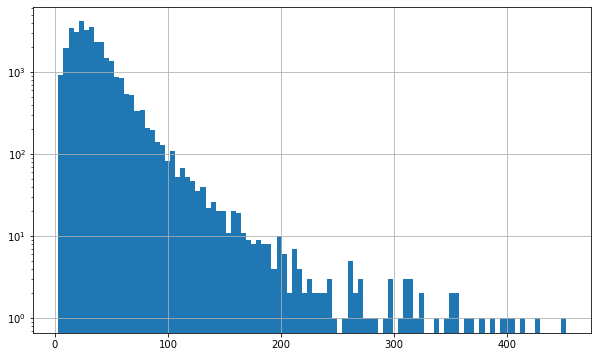

In [59]:
word_per_quote.hist(bins=100,  figsize=(10, 6))
plt.yscale('log')

plt.title('Number of words per quote')
plt.xlabel('Number of words')
plt.ylabel('Number of quotes [log]')

plt.show()

Words embeding models are sensible to the difference in the length of the quotes, thus it can be helpful to be aware that we might have issues because of this inbalance.
Not forget here that dots and commas are also counted as words. 

### Repartition over the year

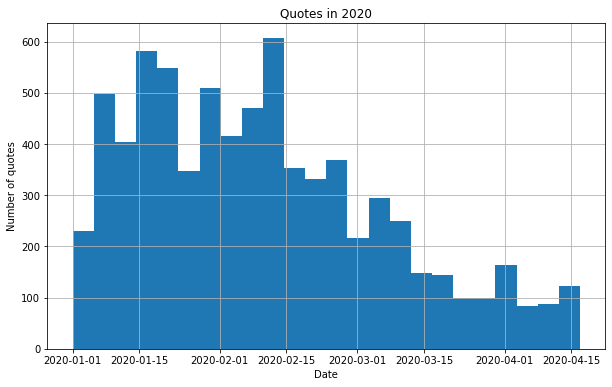

2020-01-01 00:00:00
2020-04-16 20:46:52


In [12]:
data2020['date'].hist(bins=24, figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Number of quotes')
plt.title('Quotes in 2020')
plt.show()

print(min(data2020['date']))
print(max(data2020['date']))

#### Comments
* Much less apparition of the climate change in the newspapper from in March and April 2020. The decrease coincides with the explosion of the pandemic of Covid-19 in the world. 

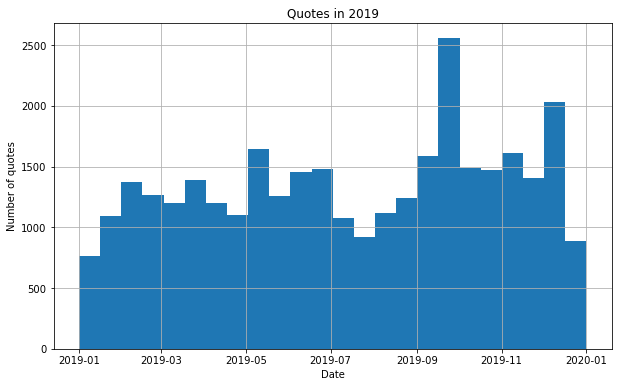

2019-01-01 02:18:32
2019-12-31 23:29:13


In [25]:
data2019['date'].hist(bins=24, figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Number of quotes')
plt.title('Quotes in 2019')
plt.show()

print(min(data2019['date']))
print(max(data2019['date']))

#### Comments
* Peak in end of september. By looking on the internet the first result shows that the month of september 2019 was the hottest ever seen since the beginning of the regostration of the temperature.
* The second peak, beginning of December, coicides with the date of the COP25.

### Speakers that come up the more often

In [26]:
n = 20
data2020['speaker'].value_counts()[:n].index.tolist()

['Bernie Sanders',
 'Scott Morrison',
 'Joaquin Phoenix',
 'Greta Thunberg',
 'Larry Fink',
 'Boris Johnson',
 'Joe Biden',
 'Jane Fonda',
 'Elizabeth Warren',
 'Antonio Guterres',
 'Malcolm Turnbull',
 'Tom Steyer',
 'Jeff Bezos',
 'Michael Mann',
 'Alok Sharma',
 'Anthony Albanese',
 'Pete Buttigieg',
 'Greg Mullins',
 'Noah Diffenbaugh',
 'Peter Soroye']

In [27]:
data2019['speaker'].value_counts()[:n].index.tolist()

['Jay Inslee',
 'Bernie Sanders',
 'Greta Thunberg',
 'Alexandria Ocasio-Cortez',
 'Elizabeth Warren',
 'Justin Trudeau',
 'Antonio Guterres',
 'Scott Morrison',
 'Catherine McKenna',
 'Gavin Newsom',
 'António Guterres',
 'Narendra Modi',
 'James Shaw',
 'Nancy Pelosi',
 'Bill Shorten',
 'Michael Mann',
 'Pete Buttigieg',
 'President Donald Trump',
 'Ed Markey',
 'Michael Bloomberg']

At first sight, we can see that there is mostly politicians.  
If we look at the american politicians, most of them are democrate: Bernie Sanders, Alexandria Ocasio-Cortez, Elizabeth Warren, Michael Bloomberg, Nancy Pelosi.
For further analysis, we will use the speaker data. 

## First attempts of quotations retrieval

We tried to apply an alorithm to pick up all the quotes related to cliamte change but it is not ready now. With the coming lecture we will be able to fix it.  
We focused on the 100 000 first lines of the 2020 dataset.


In [14]:
df = pd.read_json('quotes-2020.json.bz2', compression='bz2', nrows=100000, lines=True)

### 1. Word2Vec

In [15]:
# Preprocessing of the data to remove stop-words and tokenize the quotes
vocab_quotes = df.quotation.apply(gensim.utils.simple_preprocess)

In [16]:
# Define the model and the parameters
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4)

In [17]:
model.build_vocab(vocab_quotes, progress_per=1000)

In [18]:
model.train(vocab_quotes, total_examples=model.corpus_count, epochs=model.epochs)

(8829356, 11833700)

In [21]:
model.wv.most_similar("climate", topn=30)

[('economic', 0.7479218244552612),
 ('global', 0.7118955850601196),
 ('current', 0.701635479927063),
 ('data', 0.701321005821228),
 ('policy', 0.6959260106086731),
 ('environmental', 0.6941445469856262),
 ('science', 0.6937196850776672),
 ('economy', 0.6861879229545593),
 ('structural', 0.6811080574989319),
 ('risks', 0.6744256615638733),
 ('policies', 0.6719207763671875),
 ('carbon', 0.6714789867401123),
 ('financial', 0.670987069606781),
 ('transparency', 0.6707075238227844),
 ('significant', 0.6703941822052002),
 ('awareness', 0.6698325872421265),
 ('accurate', 0.6639865040779114),
 ('scope', 0.6620934009552002),
 ('urgency', 0.6592832207679749),
 ('sustainable', 0.659204363822937),
 ('investors', 0.6591705679893494),
 ('disruption', 0.6580424904823303),
 ('emissions', 0.6571123600006104),
 ('minimizes', 0.6541130542755127),
 ('sustainability', 0.6524901390075684),
 ('economies', 0.6507850885391235),
 ('consumer', 0.6506547331809998),
 ('comprehensive', 0.6459457874298096),
 ('coal'

A lot of words are not directly related to climamate change. We can use maybe this list to imporve ours but we can not use directly.

### 2. Doc2Vec

In [22]:
# We need to convert data into format supported by the Doc2Vec librairy
tagged_data = [TaggedDocument(words=doc, tags=[i]) for i, doc in enumerate(vocab_quotes)]

In [23]:
model = gensim.models.Doc2Vec(vector_size=100, dbow_words= 1, dm=0,  window=5, seed=1337, min_count=5, workers=4,alpha=0.025, min_alpha=0.025)

In [24]:
model.build_vocab(tagged_data)

In [25]:
model.train(tagged_data, total_examples=model.corpus_count, epochs=10)

In [26]:
tokens = "climate warming environment".split()
new_vector = model.infer_vector(tokens)
sims = model.dv.most_similar([new_vector], topn=30)

In [27]:
for elt in sims :
    print(str(df.iloc[[elt[0]]]['quotation']))

6518    Risky Business: Climate and the Macroeconomy,
Name: quotation, dtype: object
23771    in response to the climate changing,
Name: quotation, dtype: object
47475    Responses to Climate Change,
Name: quotation, dtype: object
91030    launches a movement to change the system
Name: quotation, dtype: object
19102    overrun [ ning ] the planet,
Name: quotation, dtype: object
52652    Rise Against Militarism, Racism and the Climat...
Name: quotation, dtype: object
21455    life ‐ sustaining climate system.
Name: quotation, dtype: object
10474    epically outmatched by a global pandemic.
Name: quotation, dtype: object
19419    the global elite's panic room.
Name: quotation, dtype: object
85019    Climate World War III.
Name: quotation, dtype: object
68263    The drivers in the community are for decarboni...
Name: quotation, dtype: object
40763    Adapting to climate change isn't enough.
Name: quotation, dtype: object
95234    clear climate change fuelled the ferocity of t...
Name: quo

#### Conclusion:
We get results that seem more conclusive but we still get some incoherent quotes in the results. Furthermore, we didn't find a way to scale it for our very large data set. When chunking the data, we had to train it for every chunk which takes too long. For now, we chose to stick with the naive retrieval method.